In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
intervals = pd.DataFrame([[-259.1, -254.14], 
                          [-254.14, -251.902], 
                          [-251.902, -251], 
                          [-251, -250.4]], 
                         index=["Wuchiapingian",
                                "Changhsingian",
                                "Extinction",
                                "Griesbachian"], 
                         columns=["from", "to"])

intervals["mid"] = intervals.mean(axis=1)

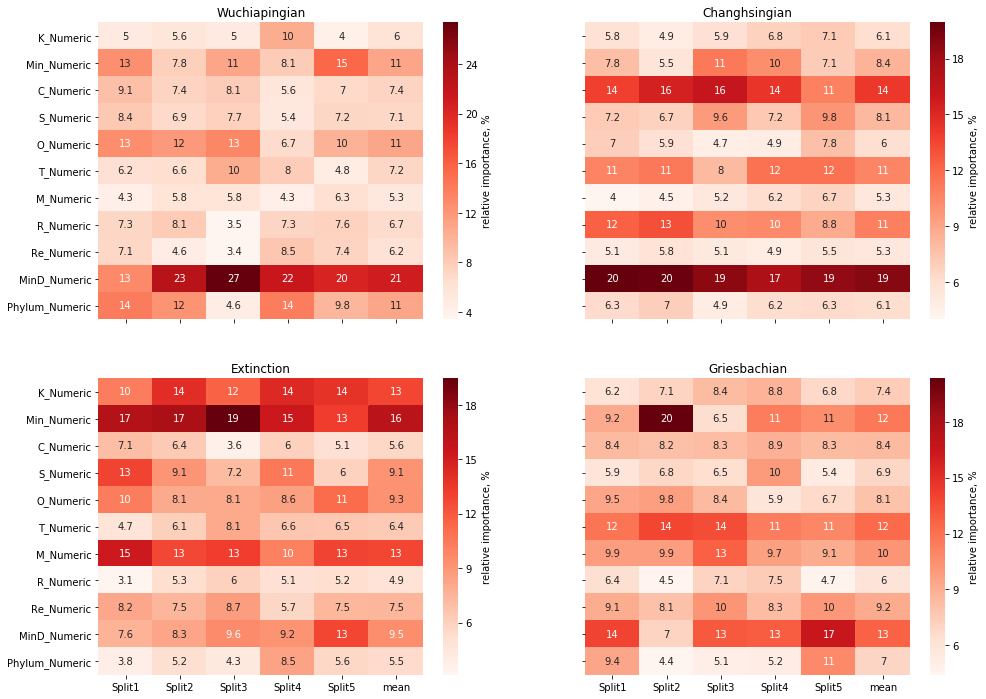

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)
axes = axes.ravel()

# loop over all analyzer Time Intervals
for i in range(1, 5):
    
    # read obtained feature importances
    fi = pd.read_csv(f"../results/TimeInterval{i}_FI.csv", index_col=0).T
    
    # calculate mean over the 5 splits
    fi["mean"] = fi.mean(axis=1)
    
    # create a figure
    sns.heatmap(fi, cmap="Reds", ax=axes[i-1], square=False, annot=True, cbar_kws={'label': 'relative importance, %'})
    
    axes[i-1].set_title(intervals.index[i-1])

#fig.savefig("../results/FI_individual.png", bbox_inches="tight", dpi=300)

In [4]:
# placeholder for collecting individual AUCs
aucs = []

# loop over all analyzer Time Intervals
for i in range(1, 5):
    
    # read obtained AUCs
    auc = pd.read_csv(f"../results/TimeInterval{i}_AUC.csv", index_col=0).T
    
    # calculate mean over the 5 splits
    #auc["mean"] = auc.mean(axis=1)
    
    # change index of the collected dataframe accordingly
    auc.index = [intervals.index[i-1]]
    
    # append to the placeholder for further concatenation
    aucs.append(auc)

aucs = pd.concat(aucs, axis=0)
aucs = aucs.T

In [5]:
aucs

,Wuchiapingian,Changhsingian,Extinction,Griesbachian
Split1,0.828889,0.686492,0.754603,0.777778
Split2,0.689630,0.778097,0.724837,0.642702
Split3,0.537538,0.751951,0.749020,0.774887
Split4,0.626126,0.766026,0.774837,0.833710
Split5,0.706081,0.821210,0.746324,0.686652


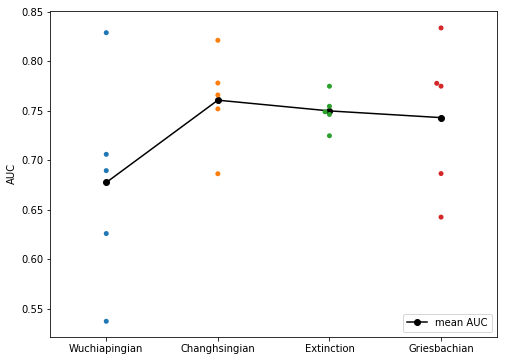

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(aucs.columns.tolist(), aucs.mean().values, c="k", linestyle="-", marker="o", label="mean AUC")
sns.swarmplot(data=aucs, ax=ax)

ax.set_ylabel("AUC")
_ = ax.legend()

#fig.savefig("../results/AUC_individual.png", bbox_inches="tight", dpi=300)